<a href="https://colab.research.google.com/github/kkipngenokoech/TReND-CaMinA-Zambia/blob/kip/notebooks/Zambia25/08-09-Tue-Wed-NeuronSpiking/08_Tue_NeuronSpiking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" width="300" src="https://raw.githubusercontent.com/trendinafrica/TReND-CaMinA/main/images/CaMinA_logo.png">


<br>

# **TReND-CaMinA 2025: Neuron spiking**


**Content creator:** Artemis Koumoundourou

**Acknowledgements:** Maxime Zimmermann for his support with *Spikeling*


---
# 🔬 **Introduction: Exploring How Neurons Encode Information**


Welcome to this hands-on neuroscience session! Today, we'll explore how neurons encode and transmit information using spikes or action potentials — the brain’s communication signals.

To do this, we’ll use **Spikeling**, a simple, open-source in-silico neuron that allows to study neuronal activity (https://github.com/OpenSourceNeuro/Spikeling-V2). With Spikeling, we can generate action potentials, manipulate firing patterns, and visualize neuronal responses to different stimuli — all in real time.


Our goals today are to:

- Understand what an **action potential** is and how it is triggered.

- Explore different **spiking patterns** and how they encode information.

- Investigate **variability in neural responses** and what it tells us about brain function.

- See how neurons respond to **stimulus intensity** and how this is captured in **tuning curves**.

- Learn how **neural populations** work together to represent stimuli.

- Get a first look at **calcium imaging** as an alternative method to study neural activity.


By the end of the session, you’ll have a deeper appreciation of how neurons operate, how we can record and interpret their activity, and how computational tools help us make sense of this complexity.

---
# **🔍 1. What is an Action Potential?**

An **action potential** is a rapid, temporary change in a neuron's membrane potential that allows it to transmit electrical signals along its axon. Triggered by a stimulus, this signal follows distinct phases—**depolarization, repolarization, and hyperpolarization**—which result from the movement of ions across the cell membrane.


<br>

📝 **Activity**

- Connect your Spikelings and open the GUI
- Set the Spikeling to Phasics Spiking mode
- Set your working folder in the GUI
- Name the file "PhasicSpiking"
- Load and apply stimulus '5i_10ms'
- Record the voltage trace
- Plot the voltage trace

<br>

🎯 **Goal**

To observe and understand how a neuron generates an action potential in response to a stimulus, and to identify the key phases that underlie electrical signaling in the nervous system.

<br>

Now, let's visualize it and observe it!


In [ ]:
# Step 1: Import the libraries we need
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the CSV file you recorded from Spikeling

from google.colab import files
uploaded = files.upload()

# Load the CSV file into a DataFrame
data = pd.read_csv('___')  # <-- Fill in the filename

# Let's check what the data looks like
data.___()  # <-- Which function lets you preview the first few rows?



In [ ]:
# @title Click to see solution

# Step 1: Import the libraries we need
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the CSV file you recorded from Spikeling

#from google.colab import files
#uploaded = files.upload()

# Load the CSV file into a DataFrame
data = pd.read_csv('PhasicSpiking.csv')

# Let's check what the data looks like
data.head()

---
💬 You should see following columns: Time (ms), Spikeling Vm (mV), Stimulus (%). You can ignore the rest for now.

---

In [ ]:
# Step 3: Find all the time points when the stimulus was active

# The stimulus is indicated in the "Stimulus" column.
# When the stimulus is on, the value is greater than 0.

stimulus_times = data[data['___'] > 0]['___']  # <-- Fill in column names

# Optional: Check if a stimulus was found
if len(stimulus_times) == 0:
    print("No stimulus found in this recording.")
else:
    stim_start = stimulus_times.iloc[___]  # <-- Index for start
    stim_end = stimulus_times.iloc[___]    # <-- Index for end
    print(f"Stimulus detected from {stim_start:.1f} ms to {stim_end:.1f} ms")




In [ ]:
# @title Click to see solution

# Step 3: Find all the time points when the stimulus was active

# The stimulus is indicated in the "Stimulus" column.
# When the stimulus is on, the value is greater than 0.

stimulus_times = data[data['Stimulus (%)'] > 0]['Time (ms)']

# Optional: Check if a stimulus was found
if len(stimulus_times) == 0:
    print("No stimulus found in this recording.")
else:
    stim_start = stimulus_times.iloc[0]  # <-- Index for start
    stim_end = stimulus_times.iloc[-1]    # <-- Index for end
    print(f"Stimulus detected from {stim_start:.1f} ms to {stim_end:.1f} ms")

In [ ]:
# Step 3.5: Define how much time to include before and after stimulus
window_before = ___  # e.g., 50 ms
window_after = ___   # e.g., 50 ms

plot_start = stim_start - ___  # <-- Fill in
plot_end = stim_start + ___    # <-- Fill in

# Extract only the part of the data within the window
extracted_data = data[(data['Time (ms)'] >= ___) & (data['Time (ms)'] <= ___)]  # <-- Fill in


In [ ]:
# @title Click to see solution

# Step 3.5: Define how much time to include before and after stimulus
window_before = 50  # e.g., 50 ms
window_after = 50   # e.g., 50 ms

plot_start = stim_start - window_before
plot_end = stim_start + window_after

# Extract only the part of the data within the window
extracted_data = data[(data['Time (ms)'] >= plot_start) & (data['Time (ms)'] <= plot_end)]


In [ ]:
# Step 4: Plot the voltage trace

plt.figure(figsize=(10, 5))

# Plot the membrane voltage
plt.plot(extracted_data['Time (ms)'], extracted_data['___'], label='Voltage (mV)', color='purple')  # <-- Voltage column name

# Highlight the stimulus interval
plt.axvspan(___, ___, color='orange', alpha=0.3, label='Stimulus')  # <-- Fill in stimulus start/end

plt.title("Action Potential Phasic Spiking Neuron")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")

plt.legend()

plt.show()

In [ ]:
# @title Click to see solution

# Step 4: Plot the voltage trace

plt.figure(figsize=(10, 5))
plt.plot(extracted_data['Time (ms)'], extracted_data['Spikeling Vm (mV)'], label='Voltage (mV)', color='purple')

# Highlight the stimulus interval
plt.axvspan(stim_start, stim_end, color='orange', alpha=0.3, label='Stimulus')

plt.title("Action Potential Phasic Spiking Neuron")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")

plt.legend()
plt.show()

# **🧠 Questions for Discussion**
- What happens to the voltage when a stimulus is applied?
- Where does the spike begin and where does it end?
- What happens to the voltage right after the spike?
- Why might the neuron only fire once in this mode?

---
# **🔍 2. Do all neurons fire in the same way when presented with a stimulus?**

Neurons do **not** all fire in the same way—even when given the **same stimulus**. Different neuron types have unique electro-chemical properties, such as ion channel distributions and membrane dynamics, that lead to characteristic firing patterns like **tonic spiking** (regular, sustained firing) or **bursting** (groups of spikes followed by pauses).

<br>

📝 **Activity**

- Set Spikeling to Tonic Spiking
- Apply a current at 10 a.u. intensity for 250 ms (use stimulus '10i_250ms')
- Record the resulting voltage over time
- Repeat for a Tonic Bursting neuron
- Visualize and compare how the two neurons respond

<br>

🎯 **Goal**

To explore how different types of neurons exhibit distinct firing patterns in response to the same stimulus, and to understand how these differences arise from the neurons' intrinsic electrical properties which contribute to their roles in neural circuits.

In [ ]:
# Step 1: Import the libraries we need
import ___ as ___      # e.g., pandas
import ___ as ___      # e.g., matplotlib.pyplot

# Step 2: Load the CSV files you recorded from Spikeling
from google.colab import ___
uploaded = ___.___()   # Function to upload files

# Load the two recordings into DataFrames
tonic = pd.read_csv('___')      # <-- Fill in filename for tonic spiking
bursting = pd.read_csv('___')   # <-- Fill in filename for bursting neuron

In [ ]:
# @title Click to see solution

# Step 1: Import the libraries we need
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the CSV file you recorded from Spikeling

from google.colab import files
uploaded = files.upload()

# Load the two recordings into DataFrames
spiking = pd.read_csv('TonicSpiking.csv')
bursting = pd.read_csv('TonicBursting.csv')


In [ ]:
# Step 3: Align the two traces on stimulus onset

# Find the time at which the stimulus starts and ends for each neuron
stim_onset_spiking = spiking[spiking['___'] > 0]['___'].iloc[0]   # <-- Which column has the time?
stim_offset_spiking = spiking[spiking['Stimulus (%)'] > 0]['Time (ms)'].iloc[-1]

stim_onset_bursting = bursting[bursting['___'] > 0]['___'].iloc[0]
stim_offset_bursting = bursting[bursting['Stimulus (%)'] > 0]['Time (ms)'].iloc[-1]

# Calculate stimulus duration (should be same for both)
stim_duration = ___ - ___  # <-- Use the bursting trace offsets and onsets

# Define how much time to include before and after stimulus
x_start = ___   # e.g., -50 ms
x_end = ___ + ___  # stimulus duration + buffer after

# Align each neuron's time axis to start at stimulus onset
spiking['___'] = spiking['Time (ms)'] - ___  # new column name and shift
bursting['___'] = bursting['Time (ms)'] - ___


In [ ]:
# @title Click to see solution

# Step 3: Align the two traces on stimulus onset

# Find the time at which the stimulus starts and ends and the duration for each neuron
stim_onset_spiking = spiking[spiking['Stimulus (%)'] > 0]['Time (ms)'].iloc[0]
stim_offset_spiking = spiking[spiking['Stimulus (%)'] > 0]['Time (ms)'].iloc[-1]


stim_onset_bursting = bursting[bursting['Stimulus (%)'] > 0]['Time (ms)'].iloc[0]
stim_offset_bursting = bursting[bursting['Stimulus (%)'] > 0]['Time (ms)'].iloc[-1]

# Calculate stimulus duration (should be same for both)
stim_duration = stim_offset_bursting - stim_onset_bursting #stimulus duration is the same for both neurons

# Define how much time to include before and after (e.g., 50 ms before and 50 ms after)
x_start = -50
x_end = stim_duration+ 50

# Align each neuron's time axis to with 0 at onset of the stimulus
tonic['AlignedTime'] = spiking['Time (ms)'] - stim_onset_spiking
bursting['AlignedTime'] = bursting['Time (ms)'] - stim_onset_bursting

In [ ]:
# Step 4: Plot the traces aligned
plt.figure(figsize=(12, 6))

# Plot Tonic Spiking
plt.subplot(2, 1, 1)
plt.plot(spiking['___'], spiking['___'], color='navy')  # <-- Aligned time and voltage column
plt.axvspan(0, ___, color='orange', alpha=0.3, label='Stimulus')  # <-- stimulus duration
plt.title("Neuron 1: ___")  # <-- Neuron type
plt.ylabel("Voltage (mV)")
plt.xlim(x_start, x_end)
plt.grid(True)

# Plot Tonic Bursting
plt.subplot(2, 1, 2)
plt.plot(bursting['___'], bursting['___'], color='darkgreen')
plt.axvspan(0, ___, color='orange', alpha=0.3, label='Stimulus')
plt.title("Neuron 2: ___")  # <-- Neuron type
plt.xlabel("Time from Stimulus Onset (ms)")
plt.ylabel("Voltage (mV)")
plt.xlim(x_start, x_end)
plt.grid(True)

plt.___()  # <-- Tidy up subplot layout
plt.___()  # <-- Display the plot

In [ ]:
# @title Click to see solution

# Step 4: Plot the traces aligned
plt.figure(figsize=(12, 6))

# Tonic Spiking
plt.subplot(2, 1, 1)
plt.plot(spiking['AlignedTime'], spiking['Spikeling Vm (mV)'], color='navy')
plt.axvspan(0, stim_duration, color='orange', alpha=0.3, label='Stimulus')
plt.title("Neuron 1: Tonic Spiking")
plt.ylabel("Voltage (mV)")
plt.xlim(x_start, x_end)
plt.grid(True)


# Tonic Bursting
plt.subplot(2, 1, 2)
plt.plot(bursting['AlignedTime'], bursting['Spikeling Vm (mV)'], color='darkgreen')
plt.axvspan(0, stim_duration, color='orange', alpha=0.3, label='Stimulus')
plt.title("Neuron 2: Tonic Bursting")
plt.xlabel("Time from Stimulus Onset (ms)")
plt.ylabel("Voltage (mV)")
plt.xlim(x_start, x_end)
plt.grid(True)


plt.tight_layout()
plt.show()

# **🧠 Questions for Discussion**

- How would you describe the firing pattern of each neuron?
- Do they fire the same number of spikes?
- Do they fire regularly?
- How quickly does each neuron respond after stimulus onset?
- Would these two firing patterns have the same effect on a postsynaptic neuron?
- Why might different firing patterns be useful in different brain areas? Can you think of situations where bursting would be useful? What about tonic spiking?





---

# **🔍 3. How do we analyze firing patterns?**

To understand how neurons encode information, we need to go beyond visual inspection and **analyze their firing patterns quantitatively**. By detecting spikes in a voltage trace—often using a simple threshold—we can extract key features like the **spike count, firing rate**, and **inter-spike interval (ISI)**. These measures help us compare how different neurons respond to stimuli and uncover how timing and frequency of spikes contribute to neural coding.


<br>

📝 **Activity**

In the previous step, we plotted voltage traces aligned to stimulus onset.

Now we will:

- Detect spikes using a simple voltage threshold.

- Count the number of spikes each neuron fired during the stimulus.

- Compute the firing rate = (spike count) ÷ (stimulus duration in seconds).

- Calculate the inter-spike intervals (ISIs) and visualize them.

<br>

**Assumption:** spikes cross a threshold of -20 mV from below

<br>

🎯 **Goal**

To learn how to quantify and analyze neuronal firing by extracting spike-based features — such as spike count, firing rate, and inter-spike interval — and to understand how these measures reveal differences in how neurons encode information in response to stimuli.


In [ ]:
# Step 1: Import numpy
import ___ as ___   # e.g., numpy

# Step 2: Detect spikes
# Set spike detection threshold
threshold = ___  # <-- in mV; choose a reasonable value like -20

# --- Detect spikes in the spiking neuron ---
# A spike is counted when the membrane potential crosses the threshold from below
spiking_spikes = spiking[
    (spiking['___'] > threshold) &   # <-- Column for voltage
    (spiking['___'].shift(1) <= threshold)  # <-- Previous value was below threshold
]

# We only want spikes that occurred during the stimulus
spiking_spikes_during_stim = spiking_spikes[
    (spiking_spikes['___'] >= 0) &           # <-- Aligned time >= 0
    (spiking_spikes['___'] <= stim_duration) # <-- Aligned time <= duration
]

# --- Repeat for bursting neuron ---
bursting_spikes = bursting[
    (bursting['Spikeling Vm (mV)'] > threshold) &
    (bursting['Spikeling Vm (mV)'].shift(1) <= threshold)
]

bursting_spikes_during_stim = bursting_spikes[
    (bursting_spikes['___'] >= 0) &
    (bursting_spikes['___'] <= stim_duration)
]

In [ ]:
# @title Click to see solution
# Step 1: Import numpy
import numpy as np


# Step 2: Detect spikes
# Set spike detection threshold
threshold = -20  # in mV

# --- Detect spikes in the spiking neuron ---
# A spike is counted when the membrane potential crosses the threshold from below

spiking_spikes = spiking[
    (spiking['Spikeling Vm (mV)'] > threshold) &
    (spiking['Spikeling Vm (mV)'].shift(1) <= threshold)
]

# We only want spikes that occurred during the stimulus
spiking_spikes_during_stim = spiking_spikes[
    (spiking_spikes['AlignedTime'] >= 0) &
    (spiking_spikes['AlignedTime'] <= stim_duration)
]

# --- Repeat for bursting neuron ---
bursting_spikes = bursting[
    (bursting['Spikeling Vm (mV)'] > threshold) &
    (bursting['Spikeling Vm (mV)'].shift(1) <= threshold)
]
bursting_spikes_during_stim = bursting_spikes[
    (bursting_spikes['AlignedTime'] >= 0) &
    (bursting_spikes['AlignedTime'] <= stim_duration)
]


In [ ]:
# Step 2.5: Plot spike trains
plt.figure(figsize=(10, 3))

# Spiking spikes at y = 2
plt.eventplot(___['___'], lineoffsets=2, colors='navy', linelengths=0.9, label='Tonic neuron')

# Bursting spikes at y = 1
plt.eventplot(___['___'], lineoffsets=1, colors='darkgreen', linelengths=0.9, label='Bursting neuron')

# Highlight stimulus window
plt.axvspan(0, ___, color='lightgray', alpha=0.3, label='Stimulus')  # <-- Stimulus duration

plt.yticks([1, 2], ['___', '___'])  # <-- Labels for neuron types
plt.xlabel("Time (ms from stimulus onset)")
plt.title("Spike train")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# @title Click to see solution

# Step 2.5: Plot spike trains
plt.figure(figsize=(10, 3))

# Plot tonic spiking neuron spikes at y=2
plt.eventplot(spiking_spikes_during_stim['AlignedTime'], lineoffsets=2, colors='navy', linelengths=0.9, label='Tonic neuron')

# Plot tonic bursting neuron spikes at y=1
plt.eventplot(bursting_spikes_during_stim['AlignedTime'], lineoffsets=1, colors='darkgreen', linelengths=0.9, label='Bursting neuron')

# Highlight stimulus window
plt.axvspan(0, stim_duration, color='lightgray', alpha=0.3, label='Stimulus')

plt.yticks([1, 2], ['Tonic Spiking', 'Tonic Bursting'])
plt.xlabel("Time (ms from stimulus onset)")
plt.title("Spike train")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

---
💬 Documentation for [`plt.eventplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.eventplot.html)

It creates a plot for events.

---

In [ ]:
# Step 3: Calculate Firing rate
# Firing rate = spikes per second

stim_duration_s = ___ / 1000  # Convert ms to seconds
spiking_rate = len(___) / stim_duration_s
bursting_rate = len(___) / stim_duration_s

# Print results
print(f"Spiking neuron: {len(spiking_spikes_during_stim)} spikes, {spiking_rate:.2f} Hz")
print(f"Bursting neuron: {len(bursting_spikes_during_stim)} spikes, {bursting_rate:.2f} Hz")

In [ ]:
# @title Click to see solution

# Step 3: Calculate Firing rate
# Firing rate = spikes per second
stim_duration_s = stim_duration / 1000  # ms → s
spiking_rate = len(spiking_spikes_during_stim) / stim_duration_s
bursting_rate = len(bursting_spikes_during_stim) / stim_duration_s

# Print the results
print(f" Tonic neuron: {len(spiking_spikes_during_stim)} spikes, {spiking_rate:.2f} Hz")
print(f" Bursting neuron: {len(bursting_spikes_during_stim)} spikes, {bursting_rate:.2f} Hz")

In [ ]:
# Step 4: Calculate and plot ISIs (Inter-Spike Intervals)

# Use np.diff to calculate time between spikes
spiking_isi = np.diff(___['___'])   # <-- Use aligned time column
burst_isi = np.diff(___['___'])

# Choose bin edges for histogram
# Tip: 1 ms bins, range = 0 to max ISI + 1
max_isi = np.max(___.max(), ___.max())
bins = np.arange(0, max_isi + 2, 1)

# Plot ISI histograms
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(spiking_isi, bins=bins, color='navy', alpha=0.7)
plt.title("Spiking Neuron ISI")
plt.xlabel("ISI (ms)")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.hist(burst_isi, bins=bins, color='darkgreen', alpha=0.7)
plt.title("Bursting Neuron ISI")
plt.xlabel("ISI (ms)")

plt.tight_layout()
plt.show()

In [ ]:
# @title Click to see solution

# Step 4: Calculate and plot ISIs (Inter-Spike Intervals)

# Use np.diff to calculate time between spikes
spiking_isi = np.diff(spiking_spikes_during_stim['AlignedTime'])
burst_isi = np.diff(bursting_spikes_during_stim['AlignedTime'])

# Choose bin edges for histogram
# Tip: 1 ms bins, range = 0 to max ISI + 1
max_isi = np.max(spiking_isi.max(), burst_isi.max())
bins = np.arange(0, max_isi + 2, 1)  # +2 to include the last interval

# Plot ISI histograms
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(spiking_isi, bins=bins, color='navy', alpha=0.7)
plt.title("Spiking Neuron ISI")
plt.xlabel("ISI (ms)")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.hist(burst_isi, bins=bins, color='darkgreen', alpha=0.7)
plt.title("Bursting Neuron ISI")
plt.xlabel("ISI (ms)")

plt.tight_layout()
plt.show()

---
💬 Documentation for [`np.diff`](https://numpy.org/doc/2.1/reference/generated/numpy.diff.html)

It calculates the difference between each pair of adjacent values in an array.

---


💬 It’s quite common in neuroscience analysis to treat the first spike differently or sometimes exclude it because it can reflect transient or adaptation effects rather than steady-state firing.

---



# **🧠 Questions for Discussion**
- How do these two neurons differ in their response patterns?
- Which neuron had a higher firing rate? Does this match your visual impression from the traces?
- What does the ISI histogram tell you about regularity?
- Is one more reliable or more variable?
- Is information encoded in how often a neuron fires, or when?

---

# **🔍 4. Does a neuron always fire the same way when presented with the same stimulus?**

Even when a neuron receives the **same stimulus**, its response can vary from trial to trial. This **neural variability** reflects the brain’s dynamic and probabilistic nature, influenced by factors like noise, internal states, and synaptic inputs. By analyzing trial-to-trial differences in spike timing and count, we gain insight into how neurons process information in **uncertain** or **changing environments**, and how this variability can be both a challenge and a feature in neural coding.

<br>

📝 **Activity**

- Set Spikeling to tonic spiking mode.

- Apply stimulus '10i_10msON_100msOFF' (10 ms stimulus at 10 a.u. intensity with 100 ms resting time). To make it more realistic you can add 5-10% noise.

- Record the membrane potential for 10 trials of the stimulus

- Overlay voltage traces from multiple trials to visually compare them

- Calculate and plot:
  - The average voltage trace with error bars showing variability.

  - The number of spikes per trial

  - The standard deviation and coefficient of variation (CV) of spike counts
  
  <br>
  
🎯 **Goal**

To investigate neural variability—a fundamental property of real neurons—by examining how a single neuron can respond differently to identical stimuli across multiple trials. This variability in membrane voltage, spike timing, and spike count plays a key role in how the brain processes information under uncertainty and adapts to changing environments.


In [ ]:
# Step 1: Import the libraries we need
import ___ as ___   # pandas
import ___ as ___   # matplotlib.pyplot
import ___ as ___   # numpy

# Step 2: Load the data
from google.colab import files
uploaded = files.upload()
Variability = pd.read_csv('___')  # <-- Replace with actual filename

In [ ]:
# @title Click to see solution

# Step 1: Import the libraries we need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load data
from google.colab import files
uploaded = files.upload()
Variability = pd.read_csv('TonicVariability.csv')


---
💬 Given that your data is a continuous recording with stimulus periods interleaved by rest periods, identifying the start of each stimulus presentation (trial) should involve looping through the data and detecting transitions where the stimulus turns on (e.g., from 0 to >0 in the Stimulus column).

We need this to convert between "samples" (data points) and "real time" (ms)

---

In [ ]:
# Step 3: Identify trials

# Define sampling interval (e.g. 0.1 ms between samples)
sampling_interval = ___  # in ms

# Define time window (before, during, after stimulus)
pre_stim_ms = ___
stim_duration_ms = ___
post_stim_ms = ___

# Convert to number of samples
pre_samples = int(pre_stim_ms / sampling_interval)
stim_samples = int(stim_duration_ms / sampling_interval)
post_samples = int(post_stim_ms / sampling_interval)

# Find stimulus onsets
# Create a Boolean mask for when the stimulus turns on
stim_on_mask = (Variability['___'].shift(1) == 0) & (Variability['Stimulus (%)'] > ___)

# Use the mask to get the corresponding index positions (stimulus onsets)
stim_onsets = Variability.index[stim_on_mask]

In [ ]:
#@title Click to see solution

# Step 3: Identify trials

# Define sampling interval
sampling_interval = 0.1  # in ms

# Define time window of interest
pre_stim_ms = 50
stim_duration_ms = 10
post_stim_ms = 50

# Convert to number of samples
pre_samples = int(pre_stim_ms / sampling_interval)
stim_samples = int(stim_duration_ms / sampling_interval)
post_samples = int(post_stim_ms / sampling_interval)

# Find stimulus onset indices
# Create a Boolean mask for when the stimulus turns on
stim_on_mask = (Variability['Stimulus (%)'].shift(1) == 0) & (Variability['Stimulus (%)'] > 0)

# Use the mask to get the corresponding index positions (stimulus onsets)
stim_onsets = Variability.index[stim_on_mask]

In [ ]:
# Step 4: Extract voltage traces for each trial
# Loop through each time the stimulus started, and extract the voltage data around it.
trials = []

for onset in stim_onsets:
    start = onset - pre_samples
    end = onset + stim_samples + post_samples
    if start >= 0 and end < len(Variability):
        voltage_trace = Variability['___'].iloc[start:end].values  # <-- Voltage column
        trials.append(voltage_trace)

# Create time axis
time_axis = np.arange(-pre_samples, stim_samples + post_samples) * sampling_interval

In [ ]:
# @title Click to see solution

# Step 4: Extract voltage traces for each trial
# Loop through each time the stimulus started, and extract the voltage data around it.
trials = []
for onset in stim_onsets:
    start = onset - pre_samples
    end = onset + stim_samples + post_samples
    if start >= 0 and end < len(Variability):
      trials.append(Variability['Spikeling Vm (mV)'].iloc[start:end].values)

# Create time axis in ms
time_axis = np.arange(-pre_samples, stim_samples + post_samples) * sampling_interval

In [ ]:
# Step 5: Plot all trials
# Hint: enumerate() is a built-in function of Python.
# This function allows us to loop over something and have an automatic counter.

plt.figure(figsize=(10, 5))

for i, trace in enumerate(trials):
    plt.plot(___, ___, alpha=0.4, label=f'Trial {i+1}' if i < 5 else None)

# Mark stimulus onset
plt.axvline(___, color='red', linestyle='--', label='Stimulus Onset')

# Formatting
plt.title("Voltage Traces Across Trials")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Voltage (mV)")
plt.legend(frameon=False)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#@title Click to see solution

# Step 5: Plot all trials in the same axis
# Hint: enumerate() is a built-in function of Python.
# This function allows us to loop over something and have an automatic counter.

plt.figure(figsize=(10, 5))

for i, trace in enumerate(trials):
    plt.plot(time_axis, trace, alpha=0.4, label=f'Trial {i+1}' if i < 5 else None)

# Mark stimulus onset
plt.axvline(0, color='red', linestyle='--', label='Stimulus Onset')

# Add labels and formatting
plt.title("Voltage Traces")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Voltage (mV)")
plt.legend(frameon=False)
plt.grid(True)
plt.tight_layout()
plt.show()


---
💬 Documentation for [`enumerate()`](https://book.pythontips.com/en/latest/enumerate.html)

When in a loop, it allows you to keep track of the number of iterations (loops).

---

# **🧠 Questions for Discussion**
- Do the voltage traces overlap exactly?
- Are there spikes in every trial?
- Do spikes occur at the same latency relative to the stimulus?
- What part of the response is consistent? What part is variable?
- What could explain differences across trials?

---
Great! Let’s now visualize the trial-to-trial variability by plotting:

- The average membrane voltage trace across trials.

- The standard deviation around that average.

- The coefficient of variation (CV) of spike counts per trial.

In [ ]:
# Step 1: Compute mean and std of your aligned trials

aligned_trials = np.array(trials)
mean_trace = np.___(aligned_trials, axis=0)   # average across trials
std_trace = np.___(aligned_trials, axis=0)    # variability across trials


In [ ]:
#@title Click to see solution

# Step 1: Compute mean and std of your aligned trials
aligned_trials = np.array(trials)
mean_trace = np.mean(aligned_trials, axis=0)
std_trace = np.std(aligned_trials, axis=0)


In [ ]:
# Step 2: Plot average trace with standard deviation

plt.figure(figsize=(10, 5))
plt.plot(time_axis, mean_trace, color='navy', label='Average Voltage')

plt.fill_between(
    time_axis,
    mean_trace - std_trace,
    mean_trace + std_trace,
    color='lightblue', alpha=0.5, label='± Std'
)

plt.axvline(___, color='red', linestyle='--', label='Stimulus Onset')  # stimulus at 0 ms
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Voltage (mV)")
plt.title("Average Membrane Voltage Across Trials")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#@title Click to see solution

# Step 2: Plot average trace with standard deviation
plt.figure(figsize=(10, 5))
plt.plot(time_axis, mean_trace, color='navy', label='Average Voltage')

plt.fill_between(time_axis, mean_trace - std_trace, mean_trace + std_trace,
                 color='lightblue', alpha=0.5, label='± Std')

plt.axvline(0, color='red', linestyle='--', label='Stimulus Onset')
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Voltage (mV)")
plt.title("Average Membrane Voltage Across Trials")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Step 3: Spike detection (within each trial)

threshold = ___   # Choose appropriate value (e.g. -20)

spike_counts = []

for trace in aligned_trials:
    above_thresh = trace > threshold
    crossings = above_thresh & ~np.roll(above_thresh, 1)  # detect upward crossings
    spike_times = time_axis[crossings]

    # Keep only spikes within stimulus window
    valid_spikes = spike_times[
        (spike_times >= 0) &
        (spike_times <= stim_duration_ms)
    ]

    spike_counts.append(len(valid_spikes))


In [ ]:
#@title Click to see solution

# Step 3: Spike detection (within each trial)

threshold = -20

spike_counts = []

for trace in aligned_trials:
    above_thresh = trace > threshold
    crossings = (above_thresh & ~np.roll(above_thresh, 1))
    spike_times = time_axis[crossings]

    # Keep only spikes that fall within the stimulus window
    valid_spikes = spike_times[(spike_times >= 0) & (spike_times <= stim_duration_ms)]
    spike_counts.append(len(valid_spikes))


In [ ]:
# Step 4: Spike count statistics

spike_counts = np.array(spike_counts)
mean_spikes = np.___(spike_counts)
std_spikes = np.___(spike_counts)
cv = std_spikes / mean_spikes if mean_spikes > 0 else np.nan

# Print the results
print(f"Mean spike count per trial: {mean_spikes:.2f}")
print(f"Standard deviation of spike count: {std_spikes:.2f}")
print(f"Coefficient of Variation (CV): {cv:.2f}")

In [ ]:
# @title Click to see solution

# Step 4: Spike count statistics

spike_counts = np.array(spike_counts)
mean_spikes = np.mean(spike_counts)
std_spikes = np.std(spike_counts)
cv = std_spikes / mean_spikes if mean_spikes > 0 else np.nan

# Print results
print(f"Mean spike count per trial: {mean_spikes:.2f}")
print(f"Standard deviation of spike count: {std_spikes:.2f}")
print(f"Coefficient of Variation (CV): {cv:.2f}")


---

# **🔍 5. What happens to the neuron spikes when the input strength increases?**

Neurons often encode stimulus intensity through changes in their **firing rate** — a concept known as **rate coding**. As the strength of the input increases, neurons typically fire more spikes or fire them more rapidly, allowing downstream neurons to interpret the intensity of the stimulus.


<br>

📝 **Activity**

- Set Spikeling to tonic spiking mode
- Apply stimulus '5x_10increase_250msON_150msOFF' and record
- Visualize and compare spikes
- Compare spike counts across stimulus levels

<br>

**🎯 Goal:**
To understand how neurons encode stimulus intensity by examining how increasing input strength affects their spiking behavior. This reflects a key principle of rate coding, where the number and timing of spikes convey information about stimulus strength in sensory and neural systems.

In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load data
# from google.colab import files
# uploaded = files.upload()
!wget https://raw.githubusercontent.com/kkipngenokoech/TReND-CaMinA-Zambia/refs/heads/main/notebooks/Zambia25/08-09-Tue-Wed-NeuronSpiking/Datasets/TonicIncrease.csv
Increase = pd.read_csv('TonicIncrease.csv')

--2025-07-09 08:04:56--  https://raw.githubusercontent.com/kkipngenokoech/TReND-CaMinA-Zambia/refs/heads/main/notebooks/Zambia25/08-09-Tue-Wed-NeuronSpiking/Datasets/TonicIncrease.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 920336 (899K) [text/plain]
Saving to: ‘TonicIncrease.csv’

TonicIncrease.csv   100%[===================>] 898.77K  --.-KB/s    in 0.06s   

2025-07-09 08:04:56 (14.8 MB/s) - ‘TonicIncrease.csv’ saved [920336/920336]



In [ ]:
# Step 3: Trial extraction by stimulus strength

sampling_interval = ___      # in ms
stim_duration_ms = ___       # stimulus length
pre_stim_ms = 50
post_stim_ms = 50

# Convert time windows into number of samples
stim_samples = int(stim_duration_ms / sampling_interval)
pre_samples = int(pre_stim_ms / ___)
post_samples = int(post_stim_ms / ___)

# Find stimulus onset points
# Create a Boolean mask for stimulus onset (0 → positive)
stim_on_mask = (Increase['Stimulus (%)'].___ == 0) & (Increase['Stimulus (%)'] > 0)

# Use .loc to get the onset rows (optional: get just the timestamps or row labels)
stim_onsets = Increase.loc[___]
stim_strengths = Increase.loc[stim_onsets, 'Stimulus (%)'].values

# Extract voltage traces for each unique stimulus strength
traces_by_strength = {}
for onset, strength in zip(stim_onsets, stim_strengths):
    start = ___
    end = ___
    if start >= 0 and end < len(Increase):
        trace = Increase['Spikeling Vm (mV)'].iloc[start:end].values
        traces_by_strength[strength] = trace

# Create time axis
time_axis = np.arange(-pre_samples, stim_samples + post_samples) * sampling_interval

In [3]:
#@title Click to see solution

# Step 3: Trial extraction by stimulus strength

# Define sampling interval, time window of interest and stimulus duration
sampling_interval = 0.1  # ms per sample
stim_duration_ms = 250
pre_stim_ms = 50
post_stim_ms = 50

# Convert time windows into the number of samples
stim_samples = int(stim_duration_ms / sampling_interval)
pre_samples = int(pre_stim_ms / sampling_interval)
post_samples = int(post_stim_ms / sampling_interval)

# Identify stimulus onsets and strengths (single pulse per strength)
stim = Increase['Stimulus (%)'].values
stim_onsets = np.where((stim[:-1] == 0) & (stim[1:] > 0))[0] + 1
stim_onsets = Increase.index[stim_onsets]

stim_strengths = Increase.loc[stim_onsets, 'Stimulus (%)'].values

# Extract traces
traces_by_strength = {}
for onset, strength in zip(stim_onsets, stim_strengths):
    start = onset - pre_samples
    end = onset + stim_samples + post_samples
    if start >= 0 and end < len(Increase):
        trace = Increase['Spikeling Vm (mV)'].iloc[start:end].values
        traces_by_strength[strength] = trace

# Time axis
time_axis = np.arange(-pre_samples, stim_samples + post_samples) * sampling_interval


In [ ]:
# Step 4: Plot the responses by stimulus strength

# Sort the stimulus strengths
sorted_strengths = sorted(___)

# Create one subplot per stimulus strength
fig, axs = plt.subplots(len(sorted_strengths), 1, figsize=(10, 2 * len(sorted_strengths)), sharex=True)

# Loop over each stimulus strength and its corresponding trace
for i, strength in enumerate(sorted_strengths):
    trace = traces_by_strength[___]
    axs[i].plot(___, ___, color='black')  # time_axis, trace
    axs[i].axvspan(0, stim_duration_ms, color='orange', alpha=0.2, label='___')
    axs[i].set_ylabel("___")               # Vm (mV)
    axs[i].set_title("Stimulus Strength: {:.1f}".format(strength))
    axs[i].___(___)                        # grid(True)

# Label x-axis only on the last subplot
axs[-1].set_xlabel("___")                 # Time (ms)

# Adjust layout and show the plot
plt.___()
plt.___()


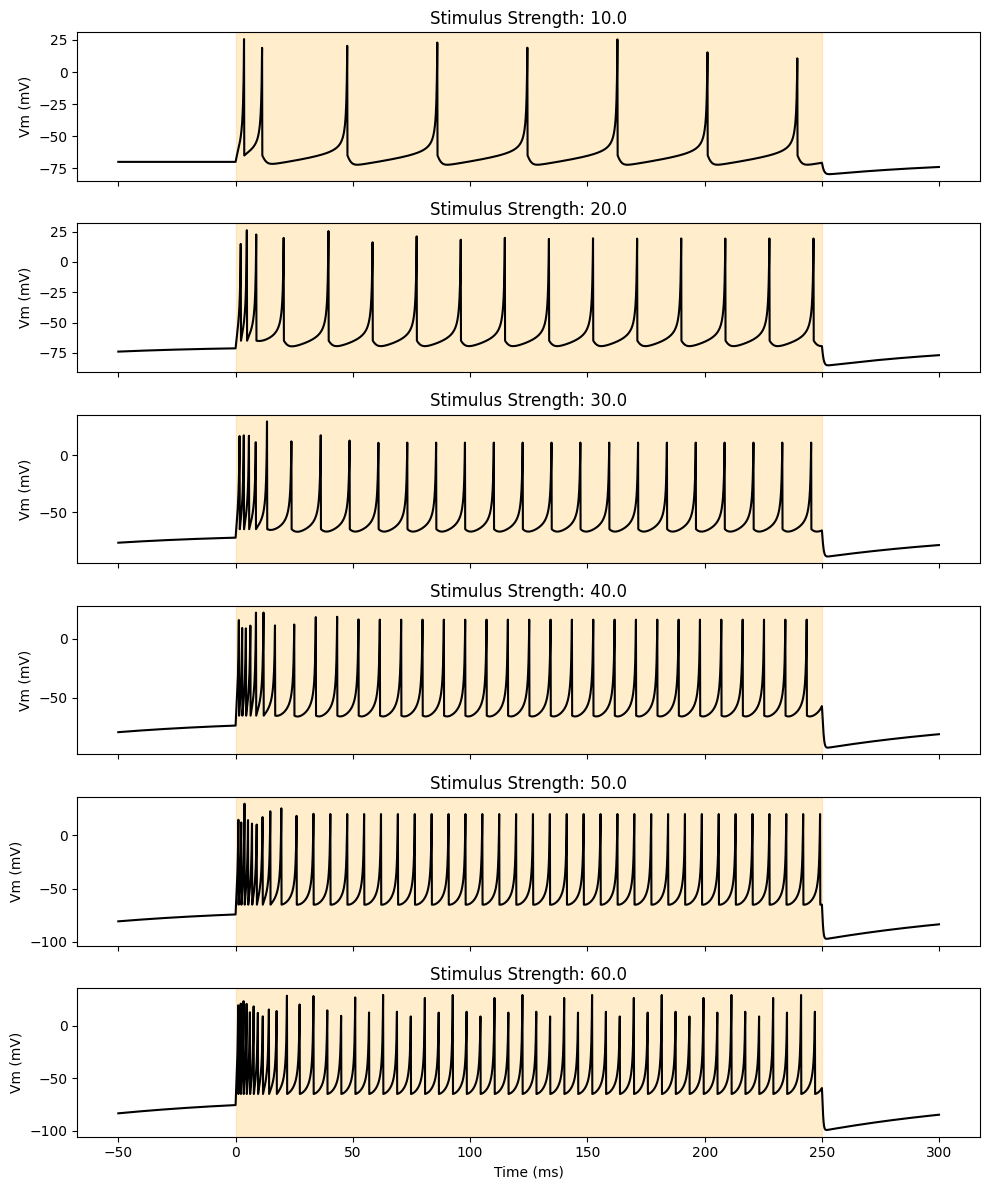

In [4]:
#@title Click to see solution

# Step 4: Plot the responses by stimulus strength

# Sort by stimulus strengths
sorted_strengths = sorted(traces_by_strength.keys())

# Create one subplot per stimulus strength
fig, axs = plt.subplots(len(sorted_strengths), 1, figsize=(10, 2 * len(sorted_strengths)), sharex=True)

# Loop over each stimulus strength and its corresponding trace
for i, strength in enumerate(sorted_strengths):
    trace = traces_by_strength[strength]
    axs[i].plot(time_axis, trace, color='black')
    axs[i].axvspan(0, stim_duration_ms, color='orange', alpha=0.2, label='Stimulus')  # Stimulus onset
    axs[i].set_ylabel("Vm (mV)")
    axs[i].set_title(f"Stimulus Strength: {strength:.1f}")
    axs[i].grid


# Label x-axis on the bottom plot only
axs[-1].set_xlabel("Time (ms)")

# Show the figure
plt.tight_layout()
plt.show()

# **🧠 Questions for Discussion**
- Does the neuron fire more spikes when presented with stronger inputs?
- Do the spikes occur earlier or change in shape?
- Is there a threshold below which the neuron doesn't fire?
- Does the neuron show signs of bursting or saturation at high input?

---
💬 A **tuning curve** is a graph that shows how a neuron's firing rate changes in response to different values of a stimulus.

Tuning curves help us understand what a neuron is sensitive to and how it encodes information.

Let's plot the tuning curve for our neuron!

---

In [5]:
# Step 1: Count spikes per stimulus strength

# Define threshold for spike detection
spike_threshold = -20  # e.g., -20 mV

# Store spike counts
spike_counts = []

# Loop through each stimulus strength
for strength in sorted_strengths:
    trace = traces_by_strength[strength]

    # Find threshold crossings
    above_thresh = trace > spike_threshold
    spike_indices = np.where((above_thresh[:-1] == False) & (above_thresh[1:] == True))[0]

    # Keep spikes that occur during the stimulus window
    spikes_in_window = [i for i in spike_indices if 0 <= time_axis[i] <= stim_duration_ms]  # stim_duration_ms
    spike_counts.append(len(spikes_in_window))

In [ ]:
# @title Click to see solution

# Step 1: Count spikes per stimulus strength

# Define threshold for spike detection
spike_threshold = -20  # mV

# Store spike counts per stimulus strength
spike_counts = []

# Loop over traces
for strength in sorted_strengths:
    trace = traces_by_strength[strength]

    # Find threshold crossings
    above_thresh = trace > spike_threshold
    spike_indices = np.where((above_thresh[:-1] == False) & (above_thresh[1:] == True))[0]

    # Keep spikes that occur during the stimulus window
    spikes_in_window = [i for i in spike_indices if 0 <= time_axis[i] <= stim_duration_ms]
    spike_counts.append(len(spikes_in_window))


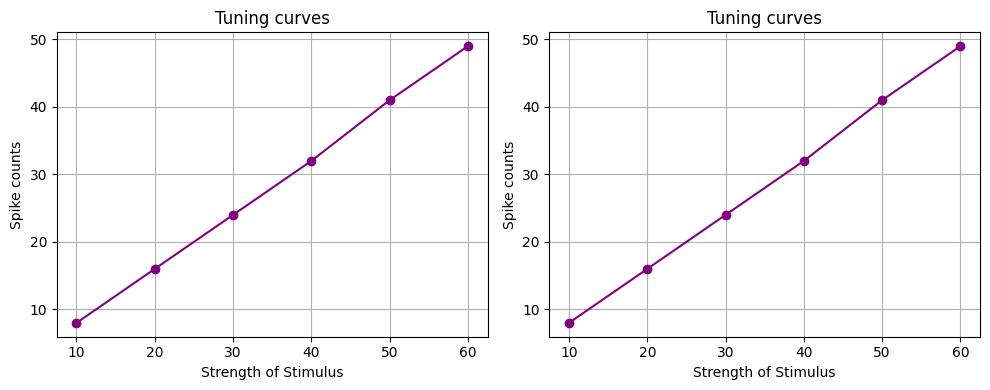

In [8]:
# Step 2: Plot the tuning curve

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(sorted_strengths, spike_counts, marker='o', color='purple')
plt.title("Tuning curves")
plt.xlabel("Strength of Stimulus")
plt.ylabel("Spike counts")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sorted_strengths, spike_counts, marker='o', color='purple')
plt.title("Tuning curves")
plt.xlabel("Strength of Stimulus")
plt.ylabel("Spike counts")
plt.grid(True)

plt.tight_layout()
plt.show()


In [11]:
help(plt.figure)

Help on function figure in module matplotlib.pyplot:

figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'
    Create a new figure, or activate an existing figure.
    
    Parameters
    ----------
    num : int or str or `.Figure` or `.SubFigure`, optional
        A unique identifier for the figure.
    
        If a figure with that identifier already exists, this figure is made
        active and returned. An integer refers to the ``Figure.number``
        attribute, a string refers to the figure label.
    
        If there is no figure with the identifier or *num* is not given, a new
        figure is created, made active and returned.  If *num* is an int, it
        will be used for the ``

In [ ]:
#@title Click to see solution

# Step 2: Plot tuning curve
plt.figure(figsize=(6, 4))
plt.plot(sorted_strengths, spike_counts, marker='o', color='purple')
plt.title("Tuning Curve")
plt.xlabel("Stimulus Strength (a.u.)")
plt.ylabel("Spike Count")
plt.grid(True)
plt.tight_layout()
plt.show()

---

# **🔍 6. Do all neurons respond in the same way to different stimuli?**

Neurons are often **selectively tuned** to particular features of a stimulus, such as intensity, frequency, or duration. This **tuning** means that different neurons can respond more strongly to some stimuli than others, forming the basis of **sensory coding** in the brain.


<br>

📝 **Activity**

- Set Spikeling to tonic spiking mode
- Load stimulus '5x_10increase_250msON_150msOFF'
- Record
- Change to neurons Tonic Bursting and Integrator and repeat
- Visualize the tuning curves for these neurons in the same plot

<br>

**🎯 Goal**

To explore how different neurons can be selectively tuned to specific stimulus features or intensities. By constructing and comparing tuning curves, you'll learn how neurons in the brain are specialized to detect particular aspects of the sensory environment and how this forms the basis of sensory coding.


In [12]:
!wget https://raw.githubusercontent.com/kkipngenokoech/TReND-CaMinA-Zambia/refs/heads/main/notebooks/Zambia25/08-09-Tue-Wed-NeuronSpiking/Datasets/TonicSpikeSteps.csv
!wget https://raw.githubusercontent.com/kkipngenokoech/TReND-CaMinA-Zambia/refs/heads/main/notebooks/Zambia25/08-09-Tue-Wed-NeuronSpiking/Datasets/TonicBurstSteps.csv
!wget https://raw.githubusercontent.com/kkipngenokoech/TReND-CaMinA-Zambia/refs/heads/main/notebooks/Zambia25/08-09-Tue-Wed-NeuronSpiking/Datasets/IntegratorSteps.csv

--2025-07-09 08:23:27--  https://raw.githubusercontent.com/kkipngenokoech/TReND-CaMinA-Zambia/refs/heads/main/notebooks/Zambia25/08-09-Tue-Wed-NeuronSpiking/Datasets/TonicSpikeSteps.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 626282 (612K) [text/plain]
Saving to: ‘TonicSpikeSteps.csv’

TonicSpikeSteps.csv 100%[===================>] 611.60K  --.-KB/s    in 0.05s   

2025-07-09 08:23:27 (11.4 MB/s) - ‘TonicSpikeSteps.csv’ saved [626282/626282]

--2025-07-09 08:23:27--  https://raw.githubusercontent.com/kkipngenokoech/TReND-CaMinA-Zambia/refs/heads/main/notebooks/Zambia25/08-09-Tue-Wed-NeuronSpiking/Datasets/TonicBurstSteps.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Conne

In [15]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Upload datasets
# from google.colab import files
# uploaded = files.upload()

# Load the three CSV files
neuron_files = {
    "Tonic Spiking": pd.read_csv("TonicSpikeSteps.csv"),
    "Tonic Bursting": pd.read_csv("TonicBurstSteps.csv"),
    "Integrator": pd.read_csv("IntegratorSteps.csv")
}
neuron_files

{'Tonic Spiking':        Time (ms)  Spikeling Vm (mV)  Stimulus (%)  Total Current Input (a.u.)  \
 0            0.0         -71.179336             0                           0   
 1            0.1         -71.176449             0                           0   
 2            0.2         -71.173569             0                           0   
 3            0.3         -71.170696             0                           0   
 4            0.4         -71.167828             0                           0   
 ...          ...                ...           ...                         ...   
 16397     1639.7         -74.350504             0                           0   
 16398     1639.8         -74.341597             0                           0   
 16399     1639.9         -74.332705             0                           0   
 16400     1640.0         -74.323828             0                           0   
 16401     1640.1         -74.314966             0                           0   

In [ ]:

# Step 2: Define sampling parameters
sampling_interval = 0.1
stim_duration = 250
stim_length = int(stim_duration / sampling_interval)


# Step 3: Function to get spike counts for each stimulus
def get_spike_counts(df, threshold=-20):
    # Create a Boolean mask where stimulus turns ON (from 0 to >0)
    stim_on_mask =

    # Use the mask to get the onset indices and values
    stim_onsets =
    stim_values =

    # Count spikes per stimulus step
    for onset in stim_onsets:
        # a) Define the window to extract voltage during stimulation
        start = ___            # stimulus onset
        end = ___              # end of stimulus window

        # b) Extract the voltage trace for that window
        segment = df['Spikeling Vm (mV)'].iloc[___:___]

        # c) Detect spikes: threshold crossing from below
        #    Hint: spike = value goes from below threshold to above
        spike_mask = (segment > threshold) & (segment.shift(1) ___ threshold)

        # d) Count how many spikes occurred
        spikes = spike_mask.___

        # e) Store the result
        spike_counts.append(spikes)

    return stim_values, spike_counts

In [ ]:
#@title Click to see solution

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Upload multiple neuron CSV files
uploaded = files.upload()

# Define sampling parameters
sampling_interval = 0.1  # ms
stim_duration = 250   # stimulus step duration in ms
stim_length = int(stim_duration / sampling_interval)  # samples per step

# Load the three CSV files
neuron_files = {
    "Tonic Spiking": pd.read_csv("TonicSpikeSteps.csv"),
    "Tonic Bursting": pd.read_csv("TonicBurstSteps.csv"),
    "Integrator": pd.read_csv("IntegratorSteps.csv")
}

# Function to extract spike counts per stimulus
def get_spike_counts(df, threshold=-20):
    # Create a Boolean mask where stimulus turns ON (from 0 to >0)
    stim_on_mask = (df['Stimulus (%)'].shift(1) == 0) & (df['Stimulus (%)'] > 0)

    # Use the mask to get the onset indices and values
    stim_onsets = df.loc[stim_on_mask].index
    stim_values = df.loc[stim_onsets, 'Stimulus (%)'].values

    spike_counts = []
    for onset in stim_onsets:
        start = onset
        end = onset + stim_length
        segment = df['Spikeling Vm (mV)'].iloc[start : end]
        spike_mask = (segment > threshold) & (segment.shift(1) <= threshold)
        spikes = spike_mask.sum()
        spike_counts.append(spikes)

    return stim_values, spike_counts


In [ ]:
# Step 4: Plotting tuning curves for each neuron type
plt.figure(figsize=(8, 5))
for name, df in neuron_files.items():
    stim_values, spike_counts = get_spike_counts(df)
    plt.plot(stim_values, spike_counts, '-o', label=name)

# Label the plot
plt.title("___")         # e.g., Tuning Curves
plt.xlabel("___")        # e.g., Stimulus Strength a.u.
plt.ylabel("___")        # e.g., Spike Count
plt.xticks(stim_values)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# @title Click to see solution

# Plot tuning curves
plt.figure(figsize=(8, 5))
for name, df in neuron_files.items():
    stim_values, spike_counts = get_spike_counts(df)
    plt.plot(stim_values, spike_counts, '-o', label=name)

plt.title("Tuning Curves")
plt.xlabel("Stimulus Strength a.u.")
plt.ylabel("Spike Count")
plt.xticks(stim_values)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

 # **🧠 Questions for Discussion**

- Which neuron starts firing at the lowest stimulus?
- Which one increases its firing rate most steeply?
- Does any neuron plateau or decrease after a certain point?
- Why might the brain need neurons that respond differently to the same stimulus?

---
# **🔍 7. Can we use the activity of multiple neurons to decode what stimulus was presented?**

The brain often relies on **population coding** — reading out activity from many neurons at once — to make sense of the world. Each neuron may respond differently to a stimulus, but **together**, their combined activity forms a unique pattern that can be used to **decode** what stimulus was presented.



<br>

📝 **Activity**

You've already calculated the tuning curves for three neurons that respond differently to the same set of stimuli. Now imagine you’re given a new trial, but you don’t know which stimulus was presented. Instead, you're told how many spikes each neuron fired in response:

- Tonic Spiking neuron: 30 spikes
- Tonic Bursting neuron: 70 spikes
- Integrator neuron: 125 spikes

<br>

Use the tuning curves you've previously computed to infer which stimulus was most likely applied. Look for the stimulus that best matches these spike counts across all three neurons.

Tip: You can do this visually by comparing spike counts to tuning curves, or compute the **Euclidean distance** between the observed spike counts and each point on the tuning curves to find the best match.

<br>

**🎯 Goal**

To understand how the brain decodes information from populations of neurons, rather than single cells. By analyzing patterns of activity across multiple neurons, you'll learn how the nervous system can accurately infer the identity or intensity of a stimulus—highlighting the principles of population coding and distributed representation in neural circuits.

In [ ]:
import numpy as np

# Known spike counts for the unknown stimulus (provided)
unknown_response =

# Set the spike detection threshold
threshold =

# Initialize a dictionary to hold spike counts for each neuron
spike_counts =

# For each neuron, count the number of spikes during each stimulus trial

    # Spike detection: count upward threshold crossings


# Create the tuning matrix
# Each row = a known stimulus
# Each column = a neuron's average spike count for that stimulus
# We'll use the neurons in a fixed order
neuron_order =
tuning_matrix =

# Create the response vector for the unknown stimulus
response_vector =

# Calculate the distance between the unknown response and each known stimulus
# (using Euclidean distance)
distances =

# Find the index of the stimulus with the smallest distance (closest match)
best_match_idx =

# Decode the stimulus value (e.g., 10%, 20%, etc.)
decoded_stimulus =

# Print the decoded result
print()

In [ ]:
# @title Click to see solution

import numpy as np

# Known spike counts for the unknown stimulus (provided)
unknown_response = {"Tonic Spiking": 30, "Tonic Bursting": 70, "Integrator": 125}

# Set the spike detection threshold
threshold= -20

# Initialize a dictionary to hold spike counts for each neuron
spike_counts = {name: [] for name in neuron_files}

# For each neuron, count the number of spikes during each stimulus trial
for name, df in neuron_files.items():
    for onset in stim_onsets:
        start = onset
        end = onset + stim_length
        vm_trace = df['Spikeling Vm (mV)'].iloc[start:end].values

        # Spike detection: count upward threshold crossings
        spike_indices = np.where((vm_trace[1:] > threshold) & (vm_trace[:-1] <= threshold))[0]
        spike_counts[name].append(len(spike_indices))


# Convert tuning curves to a matrix
tuning_matrix = np.array([spike_counts[name] for name in ["Tonic Spiking", "Tonic Bursting", "Integrator"]]).T

# Unknown response vector
response_vector = np.array([unknown_response["Tonic Spiking"],
                            unknown_response["Tonic Bursting"],
                            unknown_response["Integrator"]])

# Calculate Euclidean distance to each known stimulus
distances = np.linalg.norm(tuning_matrix - response_vector, axis=1)

# Find closest match
best_match_idx = np.argmin(distances)
decoded_stimulus = stim_values[best_match_idx]

print(f"🔍 Decoded Stimulus: {decoded_stimulus}")


 # **🧠 Questions for Discussion**

- What does this decoding method assume about the neurons?
- Could different combinations of spike counts lead to the same decoded stimulus?
- How would noise or variability in spike count affect decoding?
- Would this method work equally reliably with a large population of neurons?

---
#**About the author**
##**Artemis Koumoundourou**

- Post-doctoral researcher at the [VIB-KU Leuven Center for Brain & Disease Research](https://cbd.sites.vib.be/en#/) in Leuven, Belgium. I study how the molecular composition of synapses drives circuit connectivity and specification at the [Lab of Synapse Biology](https://dewitlab.sites.vib.be/en).
- Executive Director at [TReND in Africa](https://trendinafrica.org/).
- Links: [Bluesky](https://bsky.app/profile/akoumoundourou.bsky.social), [LinkedIn](https://www.linkedin.com/in/artemis-koumoundourou-6b77a284/), [ORCID](https://orcid.org/0000-0002-8917-5717)
- Feel free to contact me: artemis@trendinafrica.org